# <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2; text-align: center;">Data Processing</div>

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Introduction</div>

**Statement for the task:**

In this competition-style task, your objective is to build a predictive model that estimates the likelihood of individuals receiving two different vaccines: the H1N1 flu vaccine and the seasonal flu vaccine. You will create two separate probability predictions for each individual in the dataset: 
- h1n1_vaccine: The probability that an individual receives the H1N1 flu vaccine. 
- seasonal_vaccine: The probability that an individual receives the seasonal flu vaccine. 

All the information about the task is on the following site: 
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

## Preparation of Environmental Variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
PATH_DATA = 'data/'
train_features = pd.read_csv(PATH_DATA + 'training_set_features.csv')
train_labels = pd.read_csv(PATH_DATA + 'training_set_labels.csv')
test_features = pd.read_csv(PATH_DATA + 'test_set_features.csv')

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Exploratory Data Analysis (EDA)</div>

In this section, we will perform an exploratory data analysis to understand the data better. We will check for missing values and perform any necessary data cleaning and preprocessing steps.

### Dataset description

In [4]:
# Check dataset columns, and dytpes for features
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Taking a look at this summary of the dataset info, we can see that there are different values for Non-Null count for each column. This means that there are missing values in the dataset. We will have to deal with them later.

Also, it is not worth explaining the meaning of each column here, as it is already explained in the competition page.

In [5]:
# Check the first 3 rows of the dataset
train_features.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [6]:
# Check labels dataset
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
train_labels.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


Label description from the competition site:

- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

We can see that both datasets share one column, which is `respondent_id`. This column is the unique identifier for each respondent is use to relate the two datasets. We will set this column as the index for both datasets.

In [8]:
# Set the ID as index
train_features.set_index('respondent_id', inplace=True)
train_labels.set_index('respondent_id', inplace=True)

In [9]:
print("=================== SHAPE =====================")
print("Features (people, features): ",train_features.shape)
print("Labels   (people, labels):   ",train_labels.shape)

=================== SHAPE =====================
Features (people, features):  (26707, 35)
Labels   (people, labels):    (26707, 2)


Also, we will merge both datasets into one, so we can have all the information in one place and not having to deal with several variables.

In [10]:
df_patients = pd.concat([train_features, train_labels], axis=1)
# Check that the columns are concatenated
df_patients.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

Now, let's take a look at the distribution of the target variables. The encoding is as follows:
* 00 = No vaccine
* 01 = Only seasonal vaccine
* 10 = Only H1N1 vaccine
* 11 = Both vaccines

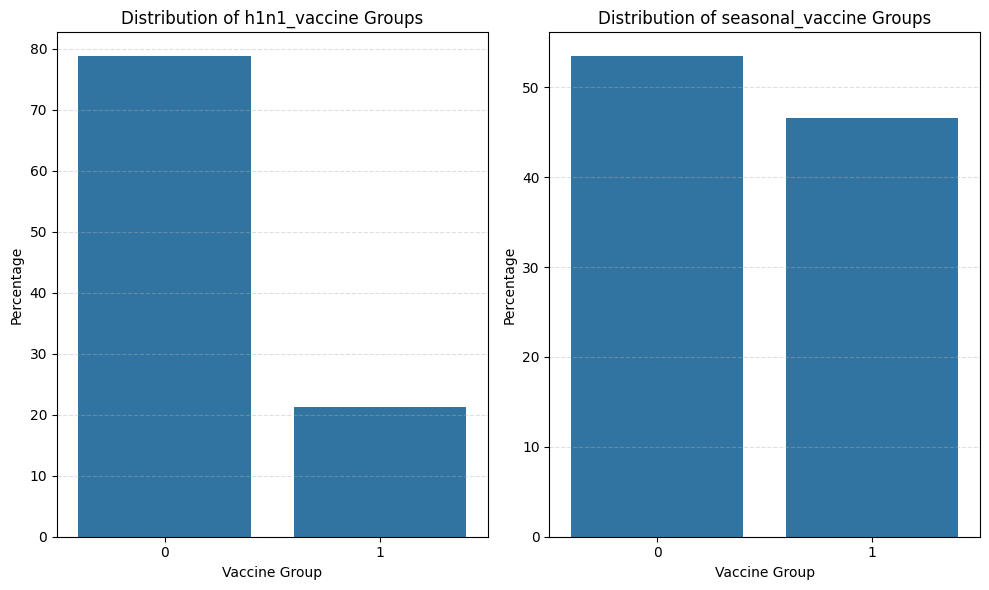

In [ ]:
# Plot the distribution of the vaccine groups
plt.figure(figsize=(10, 6))
target = ['h1n1_vaccine', 'seasonal_vaccine']
for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=target[i], data=df_patients, stat='percent')
    plt.xlabel('Vaccine Group')
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {target[i]} Groups')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

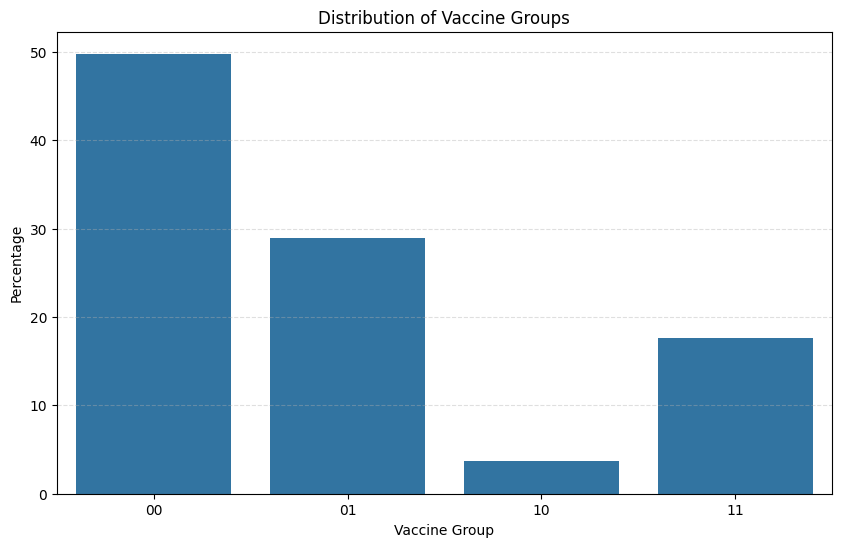

In [21]:
# Plot the distribution of h1n1_vaccine and seasonal_vaccine
# Group the labels into 00, 01, 10, 11
df_patients['vaccine_group'] = df_patients['h1n1_vaccine'].astype(str) + df_patients['seasonal_vaccine'].astype(str)

# Plot the distribution of the vaccine groups
plt.figure(figsize=(10, 6))
sns.countplot(x='vaccine_group', data=df_patients, order=['00', '01', '10', '11'], stat='percent')
plt.xlabel('Vaccine Group')
plt.ylabel('Percentage')
plt.title('Distribution of Vaccine Groups')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

The mayority of the respondents did not get any vaccine. The second most common group is the one that got only the seasonal vaccine. The group that got both vaccines is the third most common group. The group that got only the H1N1 vaccine is the least common group.

------------


### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Null values</div>

At first we dropped the instances with missing values in the training dataset. But, when using the test dataset, we found that there were missing values however, we could not drop the instances. So, we had to undo the operations and find a way to deal with the missing values.

As our first approach, was incorrect, we can't drop the missing values as they are important for the test dataset. Instead, we will fill the missing values with a default value.

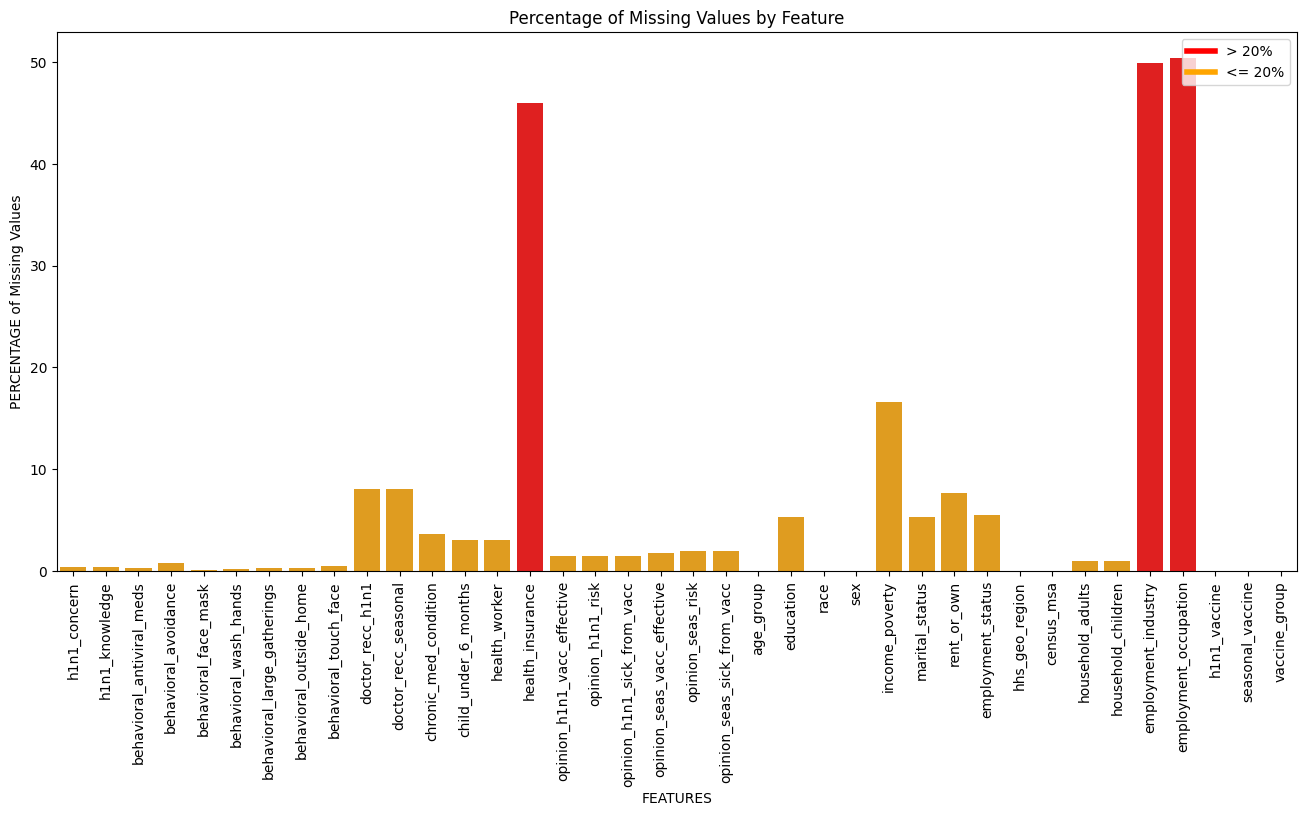

In [61]:
# Plot null values distribution
def plot_null_values(df) -> None:
    null = df.isnull().sum() # get count

    missing_percentage = (null / len(df)) * 100 # get percentage

    plt.figure(figsize=(16, 7))
    colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
    plt.xticks(rotation=90)
    plt.ylabel('PERCENTAGE of Missing Values')
    plt.xlabel('FEATURES')
    plt.title('Percentage of Missing Values by Feature')
    plt.legend(handles=[plt.Line2D([0], [0], color='red', lw=4, label='> 20%'), plt.Line2D([0], [0], color='orange', lw=4, label='<= 20%')], 
               loc='upper right')
    plt.show()
plot_null_values(df_patients)

Above, we can see that the features `employment_industry` and `employment_occupation` and `health_insurance` have a high number of missing values. While others have less than 20% which is more or less acceptable. Now, we will explore those three features to understand the missing values better but **at moment we will not drop any value**.

The description of the feature is as follows:
- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.

In [62]:
df_patients['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

The description of the feature is as follows:
- `employment_occupation` -  Type of occupation of respondent. Values are represented as short random character strings.

In [63]:
df_patients['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

The description of the feature is as follows:
- `health_insurance` - Has health insurance. (binary)

This variable seems extremely important, as in US, medical care is very expensive and having health insurance or not can influence the decision of getting the vaccine. Therefore, we will not drop this feature. 

In [64]:
df_patients['health_insurance'].unique()

array([ 1., nan,  0.])

The variables employment_occupation and employment_industry seems to be useless but we will deal with them in the future.
Now, we will fill the missing values of the features with -1 for the numerical features and 'missing' for the categorical ones. The plot is completely empty, this shows that the operation was done correctly.

**Save the dataset** with no null values, in case we want to try the models with different datasets.

In [65]:
#df_patients.to_csv('data/df_no_null.csv')

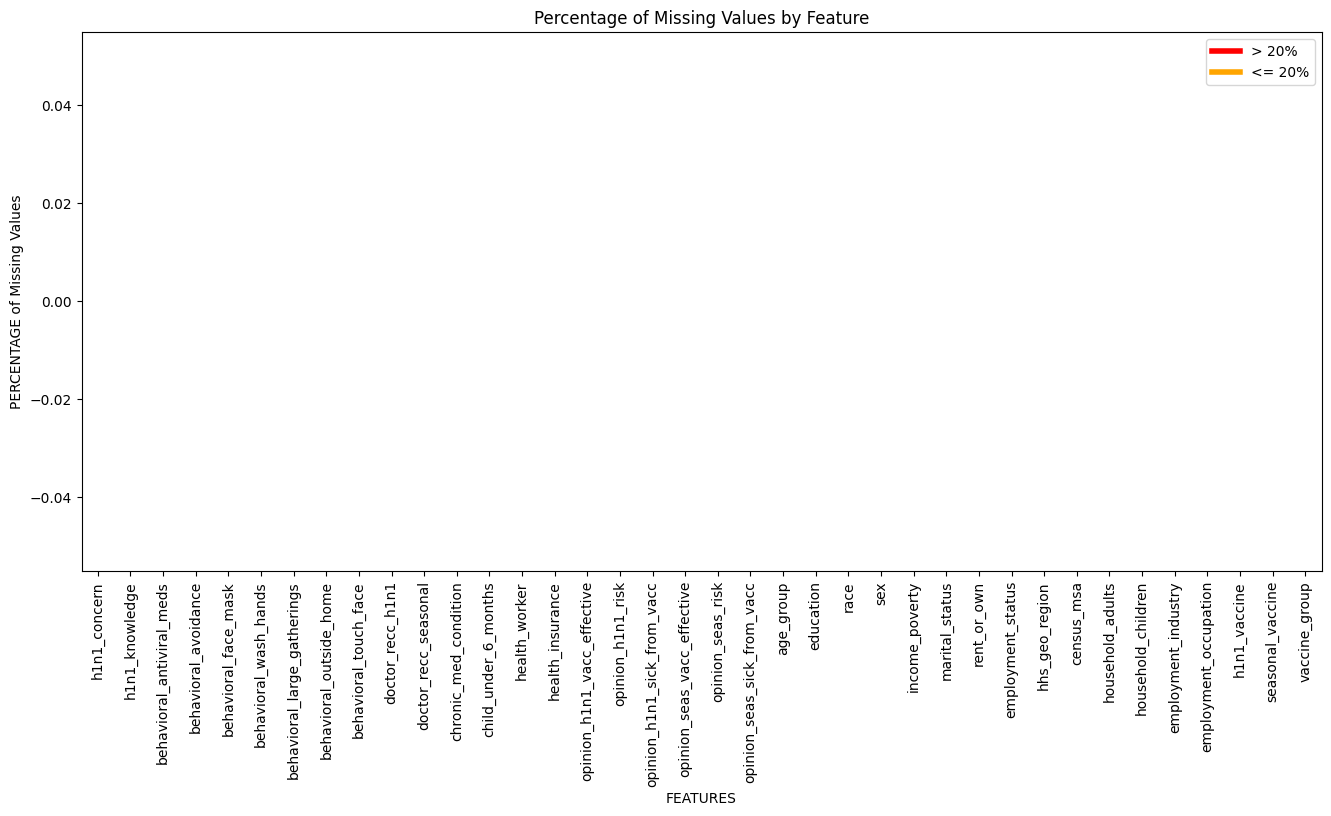

In [66]:
float_columns = df_patients.select_dtypes(include=['float64']).columns
categorical_columns = df_patients.select_dtypes(include=['object']).columns

df_patients[float_columns]=df_patients[float_columns].fillna(-1)
df_patients[categorical_columns]=df_patients[categorical_columns].fillna('missing')
plot_null_values(df_patients)

### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Correlation</div>

Now, we will check the correlation between the numerical features and target variables. But this does not have an impact on our analysis, as we can only use numerical features and those are binary, that is a representation of a categorical feature.

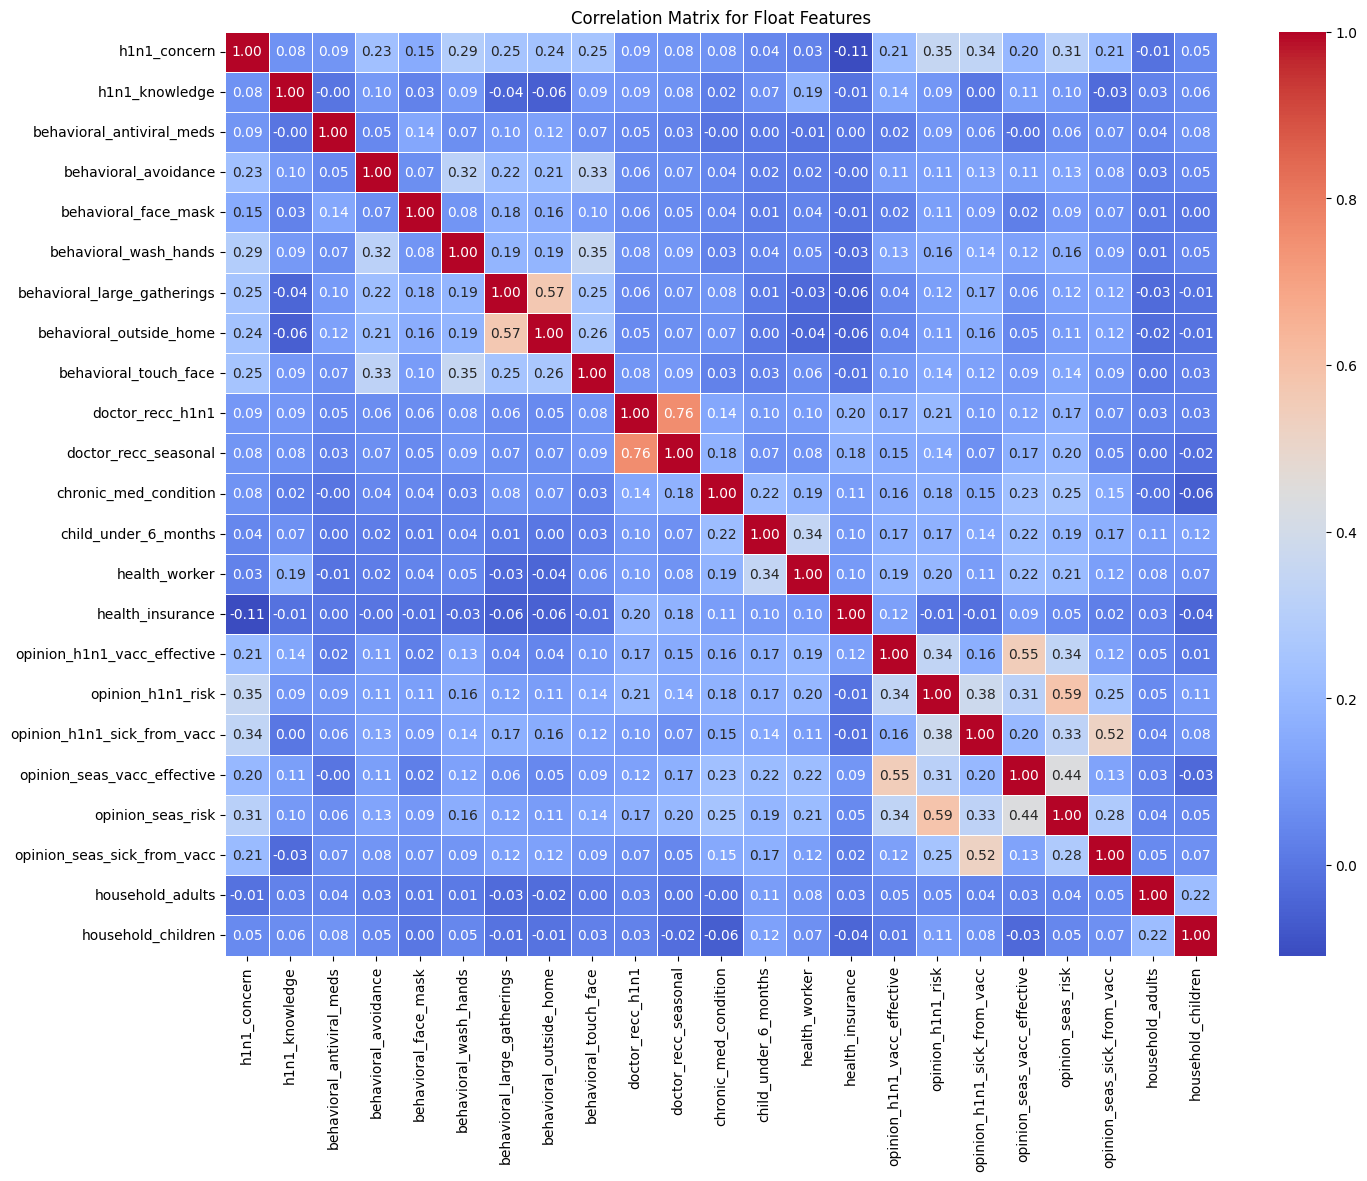

In [67]:
# Filter the dataframe to include only float features
float_features = df_patients.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = float_features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Float Features')
plt.show()

We see that there are variables related:
* doctor_rec_h1n1 and doctor_rec_seasonal: these represent the recommendation of the doctor for the vaccines. 
* opinion_h1n1_risk and opinion_seas_risk: these represent the opinion of the respondent about the risk of the diseases.
* behavioural_large_gatherings and behavioural_outside_home: these represent the if the respondent has reduced the time outside and reduce contact.

First, we will ignore these relationships and check the performance of the model. 

### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Encoding</div>

To feed the data into the model, we need to encode the categorical features.

In [72]:
# print categorical features and their values
cat_features = df_patients.select_dtypes(include=['object']).columns
cat_features = cat_features.drop(labels='vaccine_group')

for i in cat_features:
    print(i, end=": ")
    print(df_patients[i].unique())

age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'missing']
race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex: ['Female' 'Male']
income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'missing']
marital_status: ['Not Married' 'Married' 'missing']
rent_or_own: ['Own' 'Rent' 'missing']
employment_status: ['Not in Labor Force' 'Employed' 'Unemployed' 'missing']
hhs_geo_region: ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa: ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry: ['missing' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation: ['missing

We will use that list of categorical values later, but now let's change the data type for the most important variables from `object` to `categorical`.

In [30]:
# Transform columns from object type to categorical type, with order information baked in

df_patients["age_group"] = pd.Categorical(
    df_patients["age_group"],
    categories=[
        "missing",
        "18 - 34 Years",
        "35 - 44 Years",
        "45 - 54 Years",
        "55 - 64 Years",
        "65+ Years"
    ],
    ordered=True,
)

df_patients["education"] = pd.Categorical(
    df_patients["education"],
    categories=["missing","< 12 Years", "12 Years", "Some College", "College Graduate"],
    ordered=True,
)

df_patients["race"] = pd.Categorical(
    df_patients["race"],
    categories=["missing", "White", "Black", "Hispanic", "Other or Multiple"],
    ordered=True,
)

df_patients["sex"] = pd.Categorical(
    df_patients["sex"], categories=["missing", "Female", "Male"], ordered=True
)

df_patients["income_poverty"] = pd.Categorical(
    df_patients["income_poverty"],
    categories=["missing","Below Poverty", "<= $75,000, Above Poverty", "> $75,000"],
    ordered=True,
)

df_patients["marital_status"] = pd.Categorical(
    df_patients["marital_status"], categories=["missing", "Not Married", "Married"], ordered=True
)

df_patients["rent_or_own"] = pd.Categorical(
    df_patients["rent_or_own"], categories=["missing", "Rent", "Own"], ordered=True
)

df_patients["employment_status"] = pd.Categorical(
    df_patients["employment_status"],
    categories=["missing","Not in Labor Force", "Employed", "Unemployed"],
    ordered=True,
)

df_patients["census_msa"] = pd.Categorical(
    df_patients["census_msa"],
    categories=["Non-MSA", "MSA, Not Principle  City", "MSA, Principle City", "missing"],
    ordered=True,
)

After this processing, we have established an order in the categorical features and it will be useful later, when we encode them. But first, it is important to check the distribution of the categorical features.

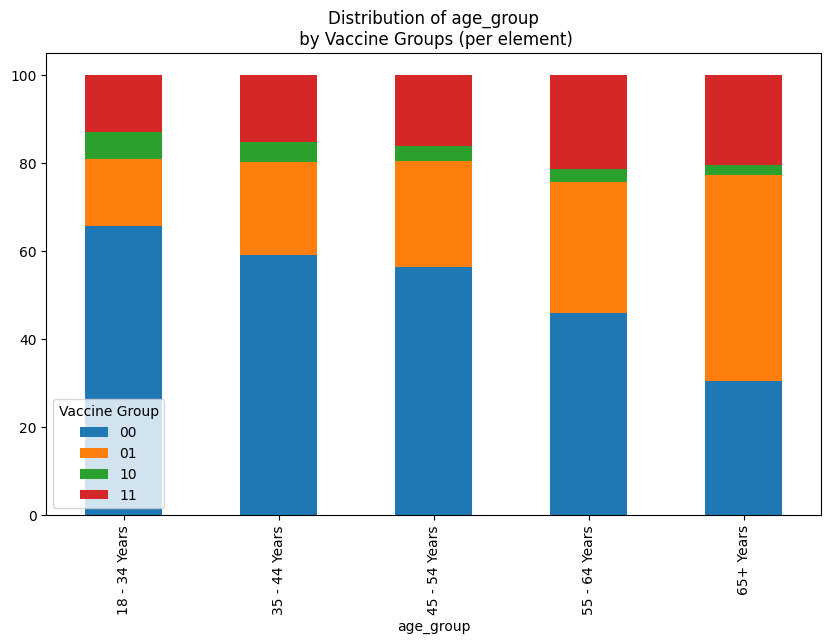

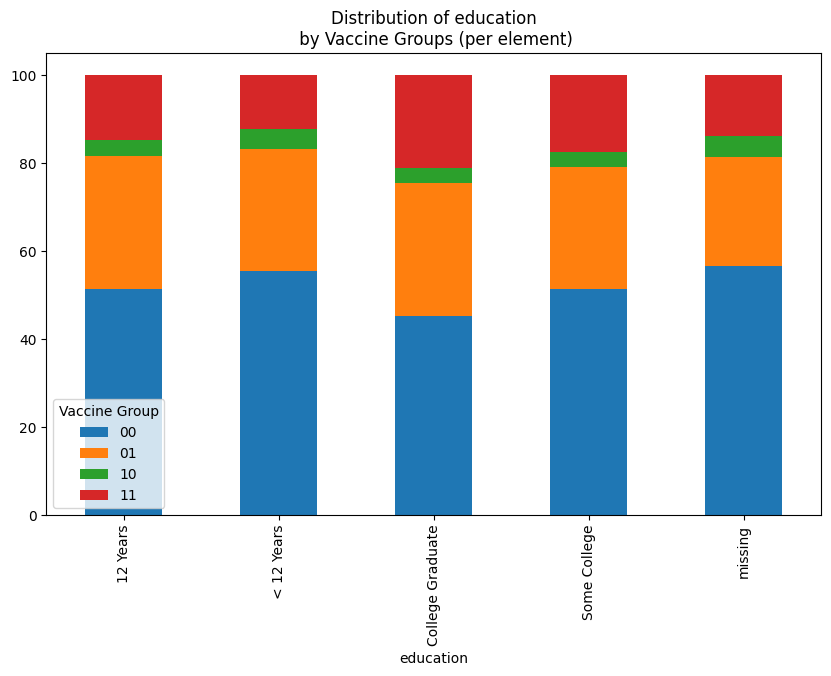

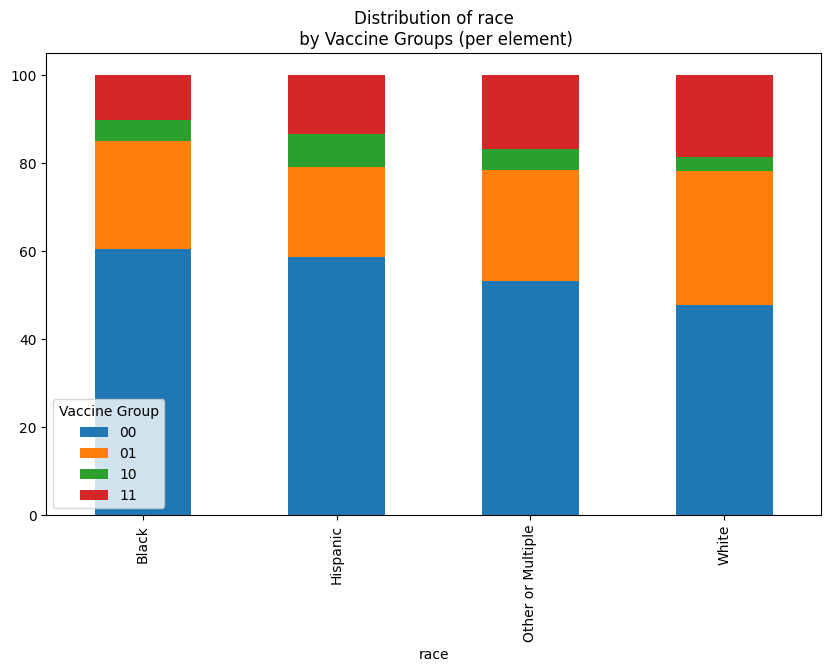

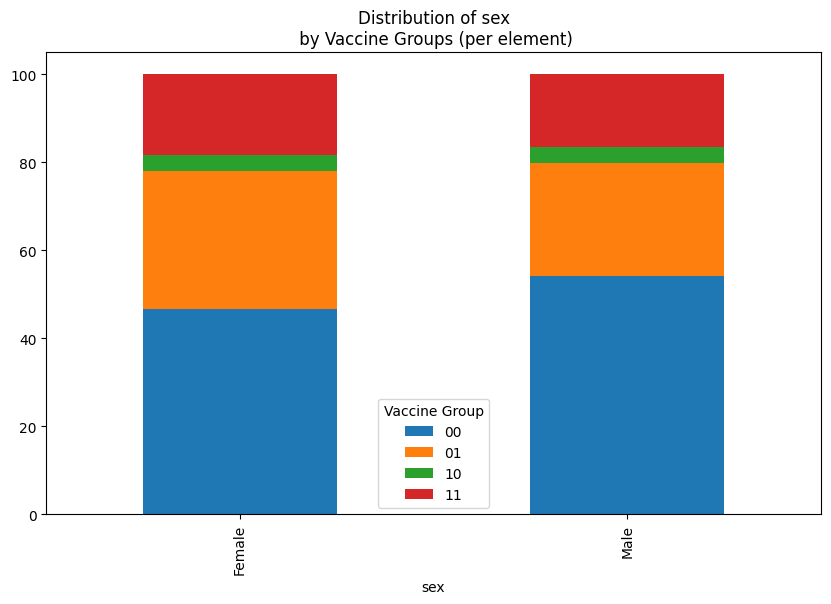

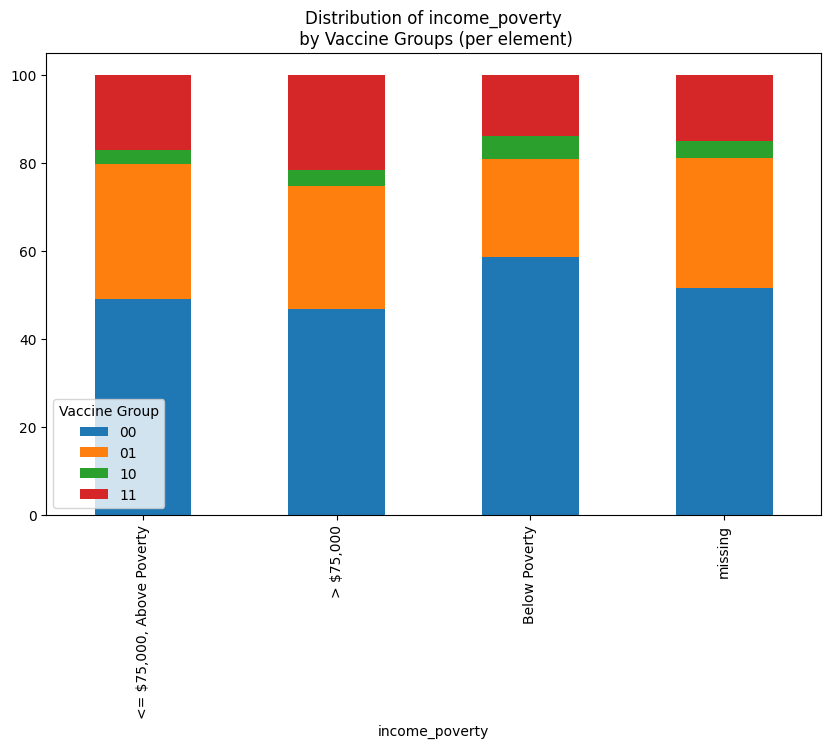

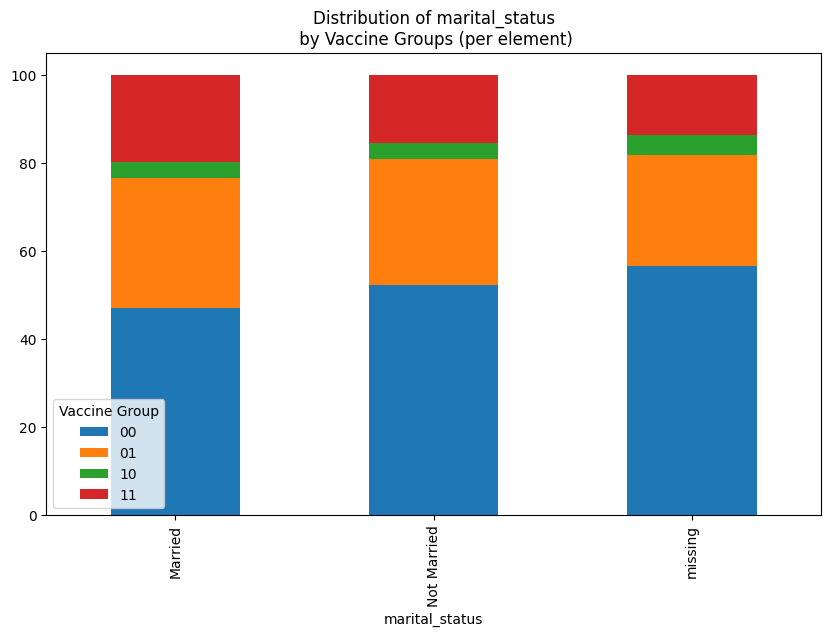

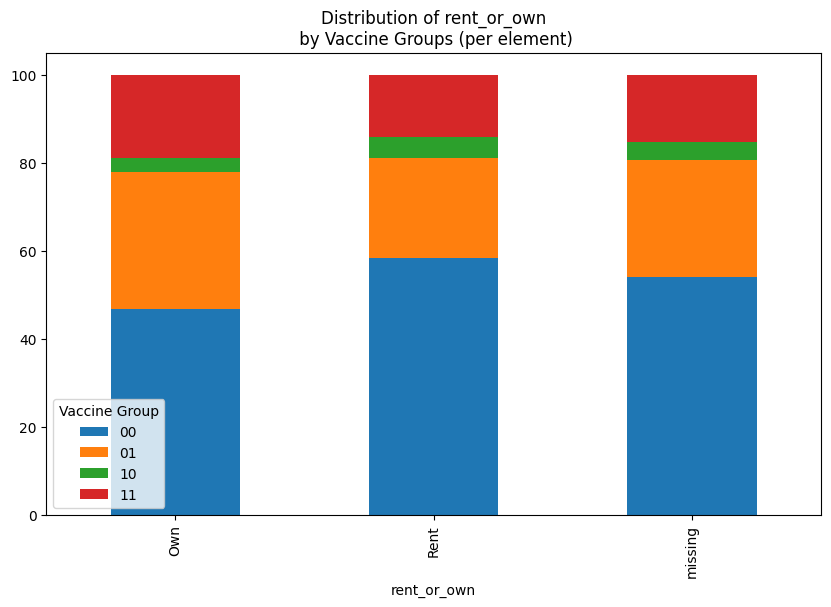

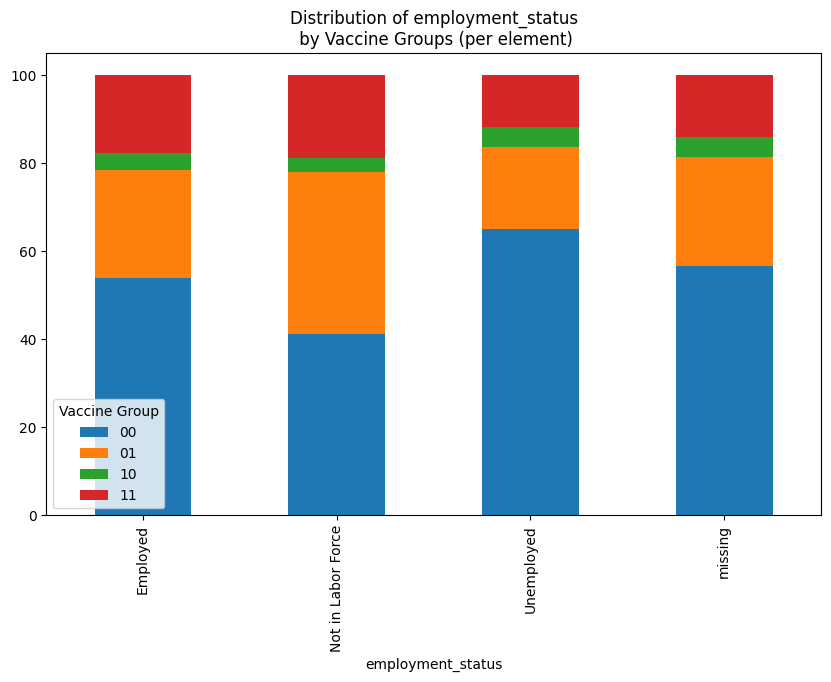

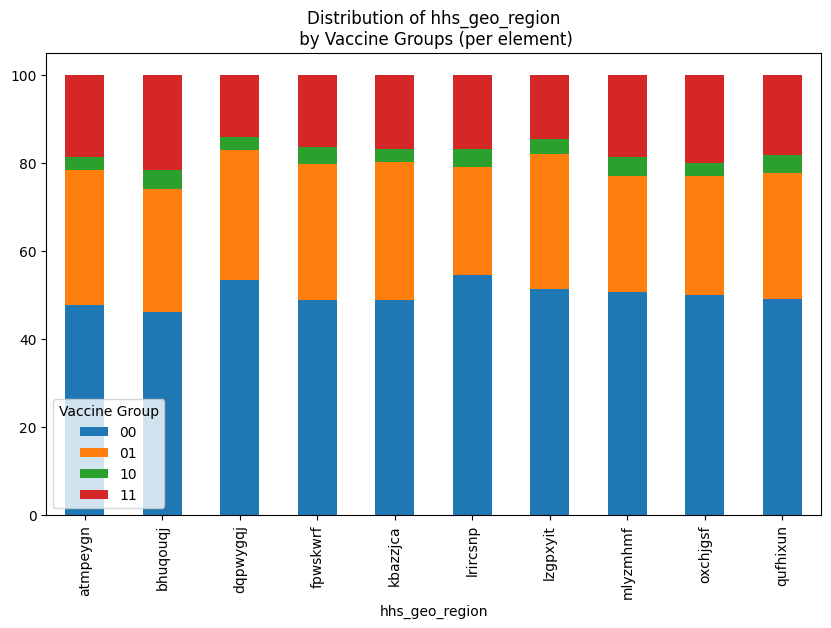

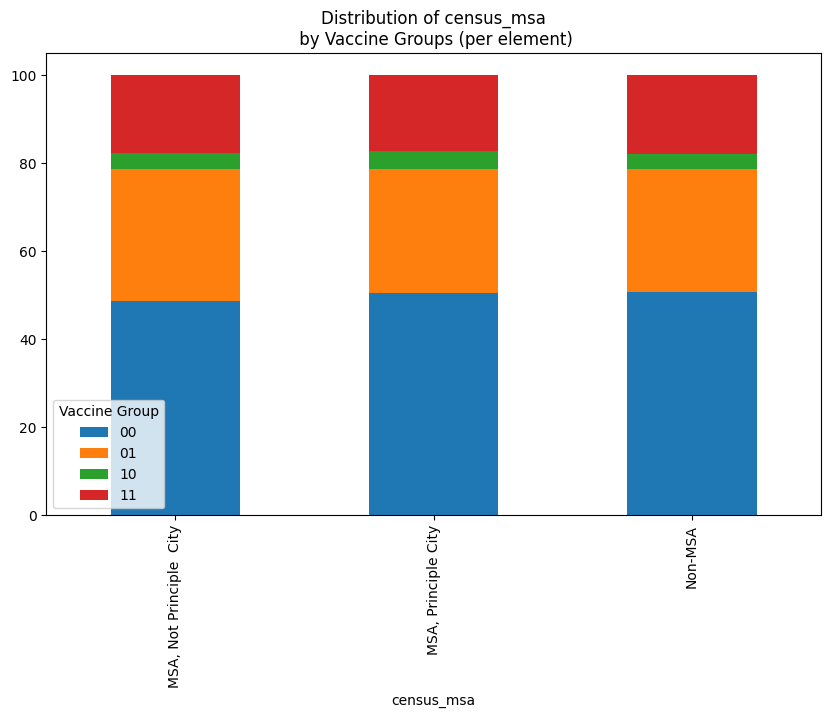

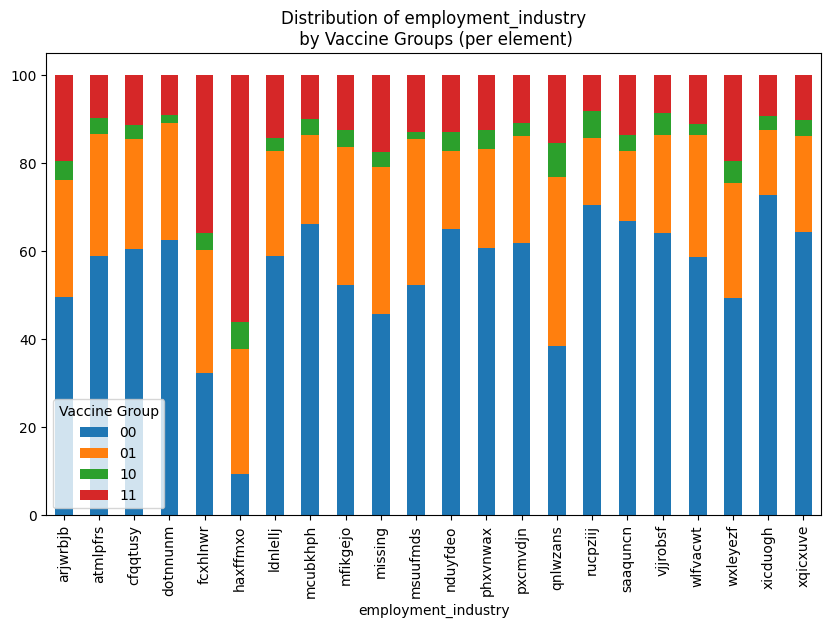

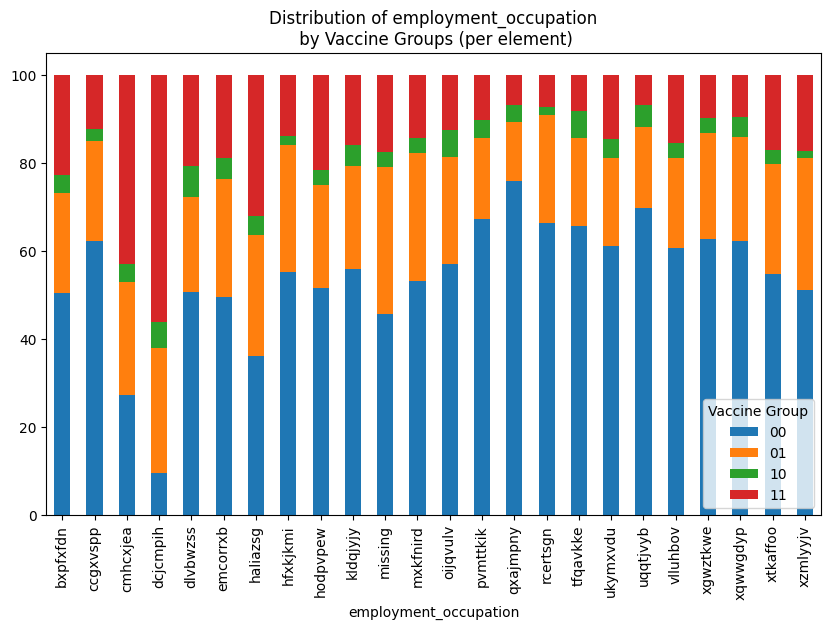

In [73]:
for i in cat_features:

    cont_table_n = pd.crosstab(df_patients[i], df_patients['vaccine_group'],normalize='index') * 100
    cont_table_n.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.xlabel(f'{i}')
    plt.title(f'Distribution of {i}\n by Vaccine Groups (per element)')
    plt.legend(title='Vaccine Group')
    plt.show()

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Test Data</div>

The same operations which were performed for the training data, will be done for the test dataset.

In [74]:
# get only the original feature columns
columns = df_patients.drop(columns =['h1n1_vaccine', 'seasonal_vaccine', 'vaccine_group']).columns
columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [75]:
# set same index
test_features.set_index('respondent_id', inplace=True)
test_features = test_features[columns] 

In [76]:
test_features.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp


In [77]:
# fill the missing values
float_columns = test_features.select_dtypes(include=['float64']).columns
categorical_columns = test_features.select_dtypes(include=['object']).columns

test_features[float_columns]=test_features[float_columns].fillna(-1)
test_features[categorical_columns]=test_features[categorical_columns].fillna('missing')

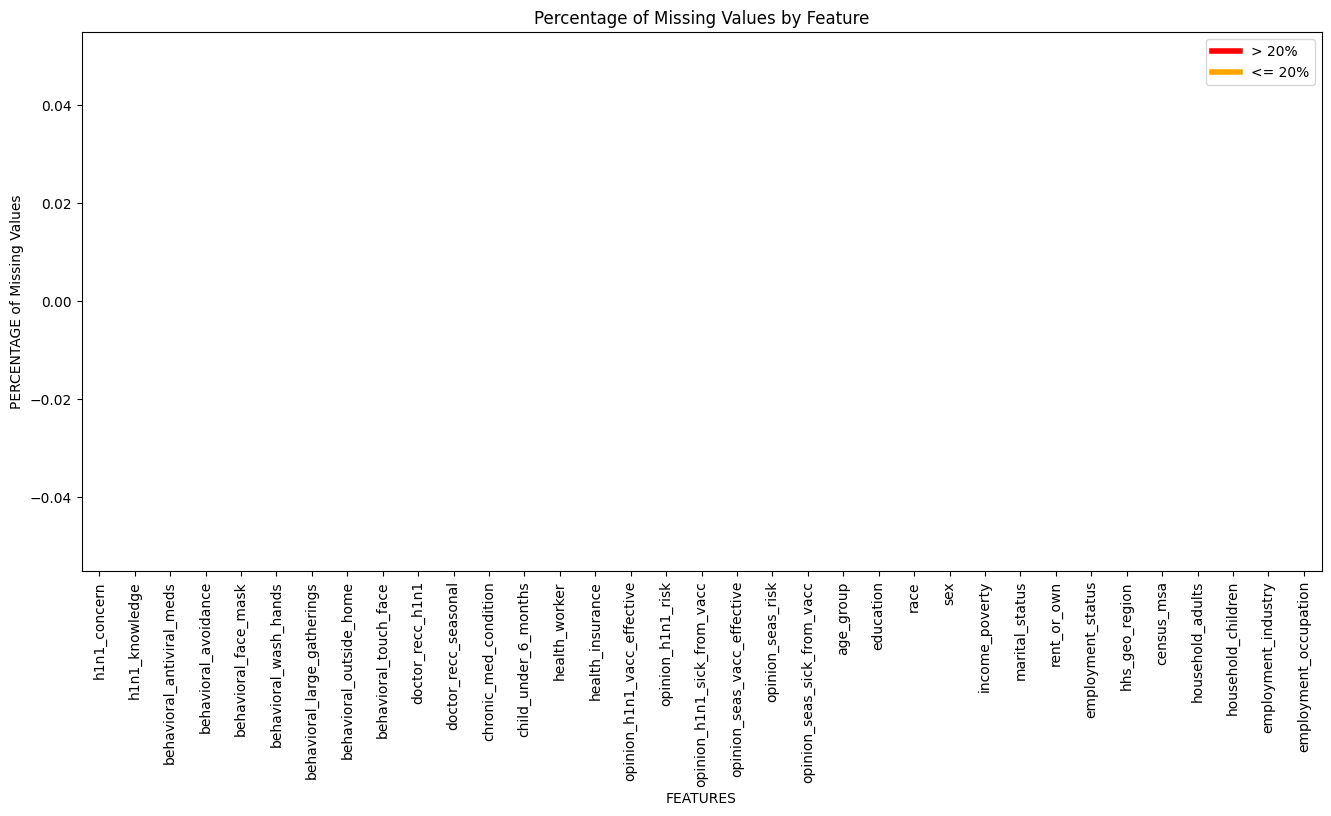

In [78]:
plot_null_values(test_features)
# All the null values are filled

In [79]:
test_features.to_csv('data/test_no_null.csv')

### <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4a44c2;">Encoding traininig and test data</div>

The same enconding will be done for both datasets, so instead of performing the operations manually, we will use the `OrdinalEncoder` from `sklearn` but at this point, any other encoder could be used. In addition, we decided to select this encoder because in the future we would be able to create a dataset with `OneHotEncoding`, that transforms each value of a variable to 0 or 1.

In [81]:
# Combine training and test data to fit the encoder with all possible categories
combined_data = pd.concat([df_patients[cat_features], test_features[categorical_columns]], axis=0)

# Refit the encoder with the combined data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(combined_data)

# Transform 
df_encoded = df_patients.copy()
df_encoded.drop(columns=['vaccine_group'], inplace=True)
df_encoded[cat_features] = encoder.transform(df_encoded[cat_features])
test_encoded = test_features.copy()
test_encoded[categorical_columns] = encoder.transform(test_encoded[categorical_columns])

The final datasets are saved.

In [82]:
df_encoded.to_csv('data/df_encoded_all.csv')
test_encoded.to_csv('data/test_encoded_all.csv')

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">EXTRA FEATURE</div>

In order to use MLflow to track the experiments, we implemented the class Dataset, which is resposible for loading the datasets and performing some operations on them. 

The class has the following methods:
- `with_correlation`: this method return the dataset as it was saved, with the correlation between the features and the target variables.
- `with_onehot`: this method return the dataset with one hot encoding.
- `with_division`: this method return the dataset with the target variables separated from the features.

In [1]:
from mlflow.create_dataset import Dataset

data = Dataset()

X, y, test = data.with_onehot()
X

<26707x127 sparse matrix of type '<class 'numpy.float64'>'
	with 854624 stored elements in Compressed Sparse Row format>

## <div style="border: 3px solid #FFFFF; padding: 10px; border-radius: 5px; background-color: #4484c2;">Outliers: DBSCAN</div>

As we progressed in the competition, we realized we couldn't improve our ranking further with our current approaches, so we decided to explore additional processing techniques. We opted to implement DBSCAN for outlier removal.

In [97]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneebow.rotor import Rotor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlflow.create_dataset import Dataset

In [84]:
data = Dataset()
X, y = data.with_correlation()
output = data.test

In [85]:
# PCA to visualize the dataset TRAINING
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_scaled)

print("Percentage of variance explained by each component:\n", estimator.explained_variance_ratio_)

Percentage of variance explained by each component:
 [0.13382668 0.08948606]


In [86]:
# PCA on TESTING
scaler = StandardScaler()
test_scaled = scaler.fit_transform(output)
estimator = PCA(n_components=2)
t_pca = estimator.fit_transform(test_scaled)

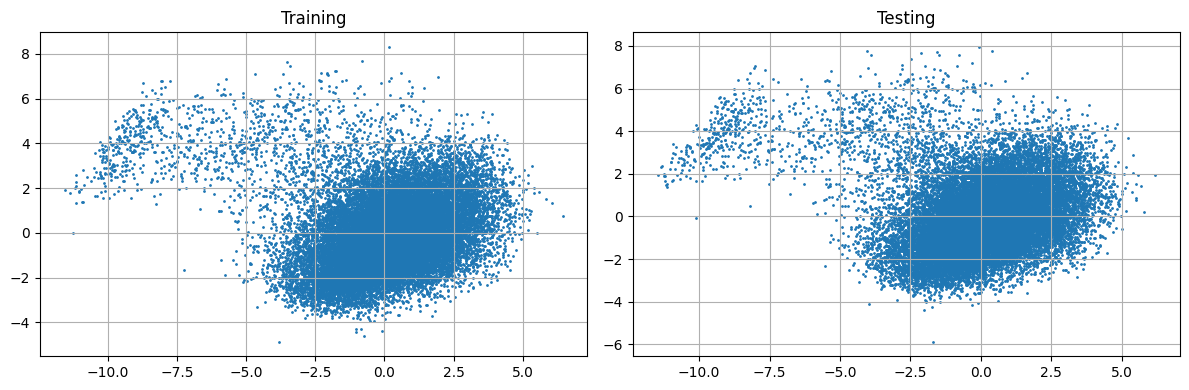

In [87]:
# Ploting both datasets
pca = [X_pca, t_pca]
titles = ['Training', 'Testing']

plt.figure(figsize=(12, 4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.scatter(pca[i][:,0], pca[i][:,1],s=1)
    plt.grid()
    plt.title(titles[i])

plt.tight_layout()
plt.show()

It is worth saying that both the training and testing datasets have the exact representation. This similarity suggests that patterns are consistent across both sets so the test data correctly validates our model.

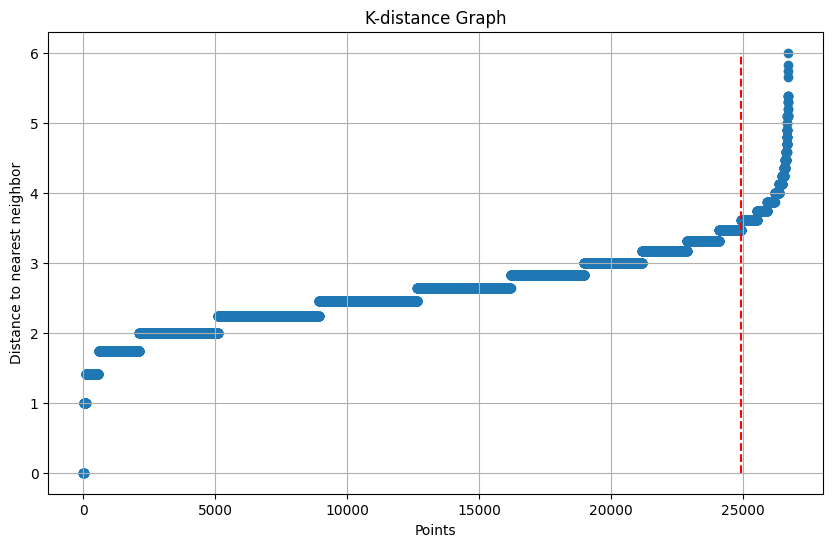

Best value for eps  3.4641016151377544


In [111]:
# First, let's find a good eps value
# We'll use k-nearest neighbors to plot the distances
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

plt.figure(figsize=(10, 6))
# Sort distances in ascending order
distances = np.sort(distances[:,1])
rotor = Rotor()
curve_xy=np.concatenate([np.arange(distances.shape[0]).reshape(-1,1), distances.reshape(-1,1)] ,1)
rotor.fit_rotate(curve_xy)
rotor.plot_elbow()
value_x = rotor.get_elbow_index()

plt.xlabel('Points')
plt.ylabel('Distance to nearest neighbor')
plt.title('K-distance Graph')
plt.grid()
plt.show()
print("Best value for eps ", curve_xy[value_x][1])

In [134]:
min_samples_values = [5, 7, 9, 10]

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=3.46, min_samples=min_samples, metric = 'euclidean', n_jobs=-1)
    clusters = dbscan.fit_predict(X)
    
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_outliers = np.sum(clusters == -1)

    print(f"Min samples: {min_samples}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of outliers: {n_outliers}")
    print(f"Percentage of outliers: {n_outliers/len(clusters)*100:.2f}%\n")

Min samples: 5
Number of clusters: 10
Number of outliers: 3287
Percentage of outliers: 12.31%

Min samples: 7
Number of clusters: 7
Number of outliers: 3691
Percentage of outliers: 13.82%

Min samples: 9
Number of clusters: 5
Number of outliers: 3987
Percentage of outliers: 14.93%

Min samples: 10
Number of clusters: 7
Number of outliers: 4107
Percentage of outliers: 15.38%



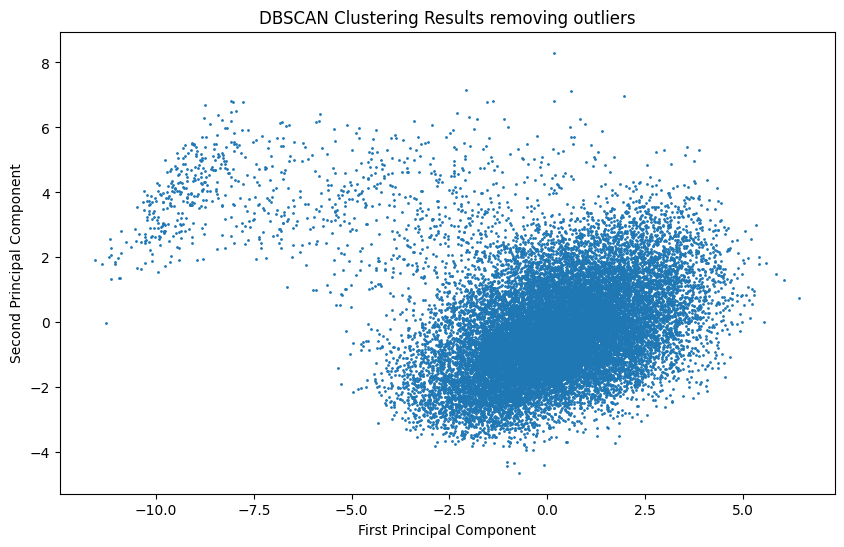

Number of clusters: 10
Number of outliers: 3287
Percentage of outliers: 12.31%



In [137]:
# DBSCAN change parameters as needed
dbscan = DBSCAN(eps=3.46, min_samples=5, metric='euclidean')  
final_clusters = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[final_clusters != -1, 0], X_pca[final_clusters != -1, 1], s=1)
# plt.scatter(X_pca[final_clusters == -1, 0], X_pca[final_clusters == -1, 1], color='red', s=1)
plt.title('DBSCAN Clustering Results removing outliers')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [138]:
# Identify outliers
outlier_mask = final_clusters != -1  # False for outliers

X_filtered = X[outlier_mask]
y_filtered = y[outlier_mask]

print("previous shape of X", X.shape)
print("new shape of filtered X", X_filtered.shape)

previous shape of X (26707, 32)
new shape of filtered X (23420, 32)


In [140]:
filtered = pd.concat([X_filtered, y_filtered], axis=1)
filtered.to_csv('data/df_encoded_no_outliers.csv')